# ISM4641 Final Project: Restaurant Sales Analysis
### by Quan Tran and Vance Dimmick

In [2]:
# Import necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [3]:
# Read the dataset
df = pd.read_csv(r"/Users/jacksontran/Desktop/ISM4641/restaurant_data.csv")

In [4]:
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


# Preliminary Analysis

In [5]:
# Display summary statistics
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [6]:
# Data size
df.shape

(8368, 17)

In [7]:
# Check null values
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [8]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

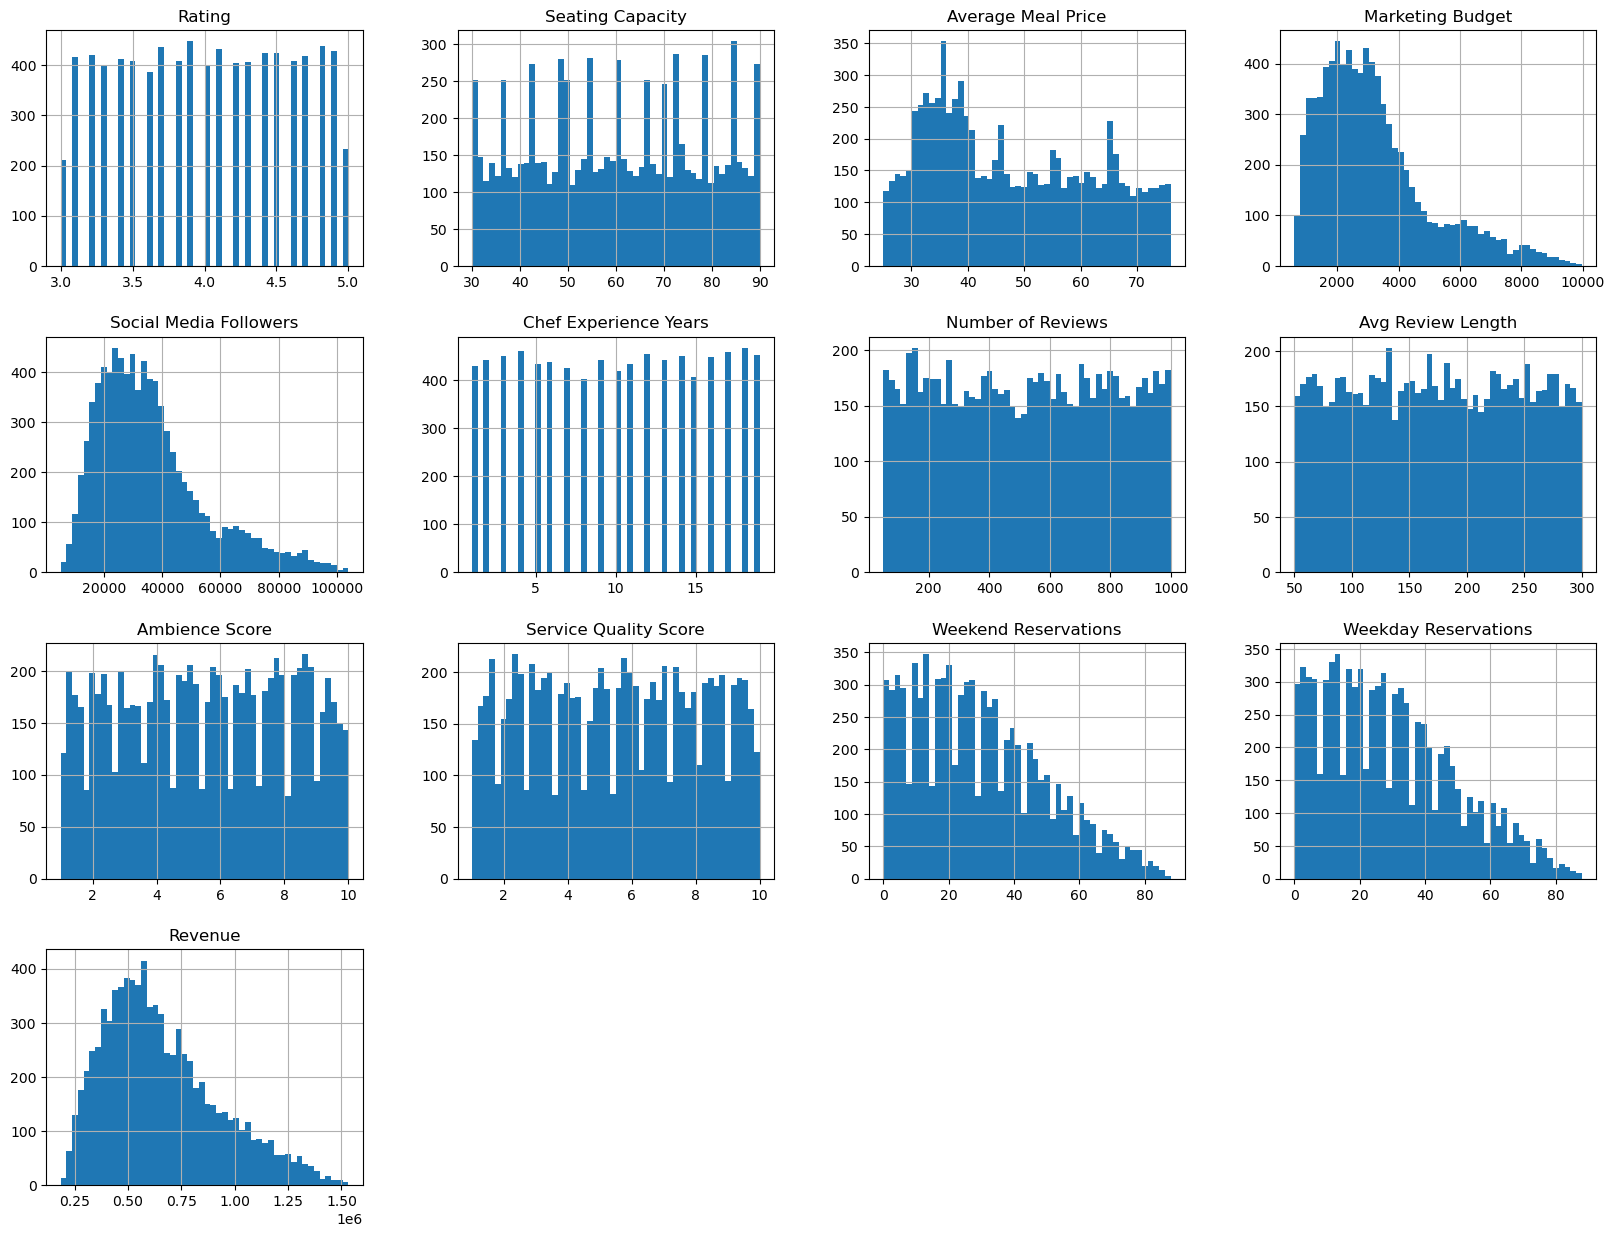

In [9]:
# Create multiple histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# Count by cuisine
df.groupby('Cuisine')['Revenue'].count().reset_index().sort_values(by = 'Revenue', ascending = False)

,Cuisine,Revenue
1,French,1433
0,American,1416
3,Italian,1413
5,Mexican,1393
2,Indian,1369
4,Japanese,1344


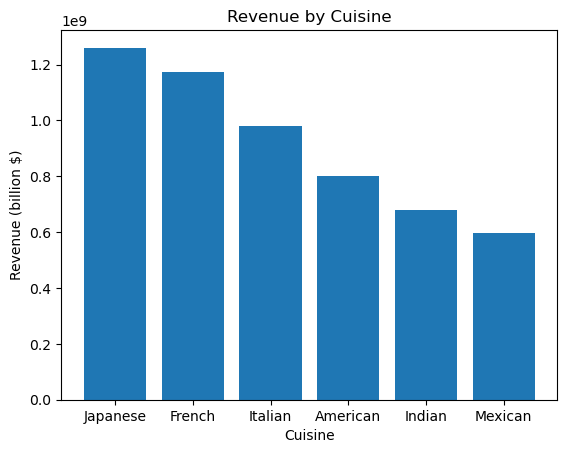

In [11]:
# Plot a bar graph of the top cuisines with the best revenue
revenue = df.groupby('Cuisine')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
pd.DataFrame(revenue)

plt.bar(revenue['Cuisine'], revenue['Revenue'])
plt.xlabel('Cuisine')
plt.ylabel('Revenue (billion $)')
plt.title('Revenue by Cuisine')

plt.show()

In [12]:
# Average rating by cuisines
rating = df.groupby('Cuisine')['Rating'].mean().reset_index().sort_values(by = 'Rating', ascending = False)
pd.DataFrame(rating)

rating

,Cuisine,Rating
5,Mexican,4.016798
3,Italian,4.014650
2,Indian,4.012856
4,Japanese,4.012574
1,French,4.000977
0,American,3.992302


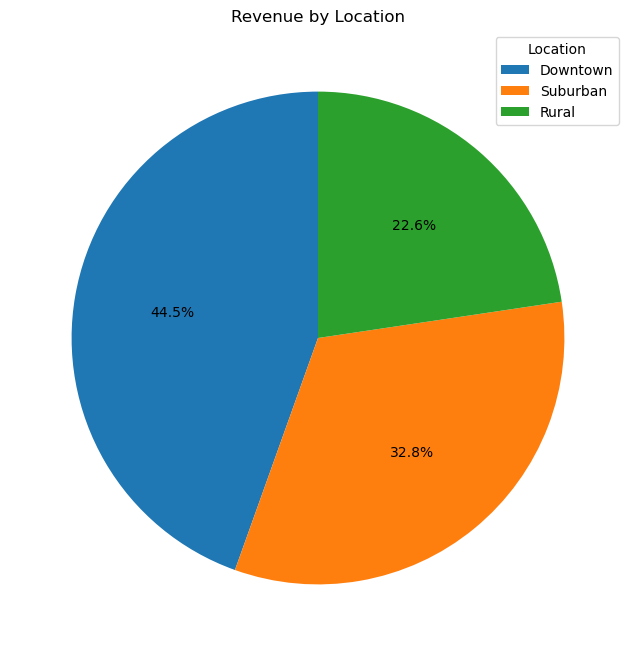

In [57]:
# Pie chart showing composition of revenue by location
loc = df.groupby('Location')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
loc['Percentage'] = (loc['Revenue']/loc['Revenue'].sum()*100)

plt.figure(figsize=(8, 8))
plt.pie(loc['Percentage'], autopct='%1.1f%%', startangle=90)

plt.legend(loc['Location'], title="Location", loc="best")
plt.title("Revenue by Location")

plt.show()

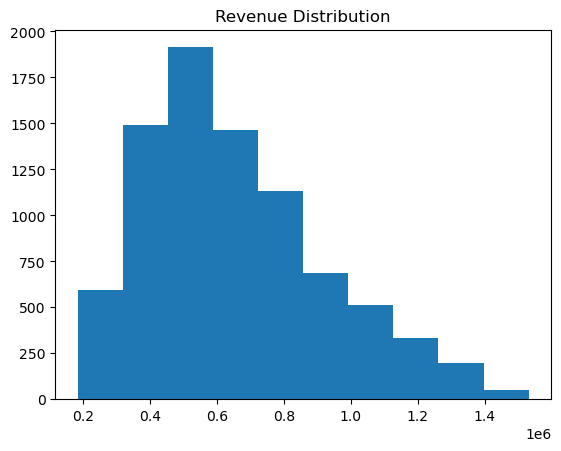

In [14]:
plt.hist(df['Revenue'])
plt.title('Revenue Distribution')

plt.show()

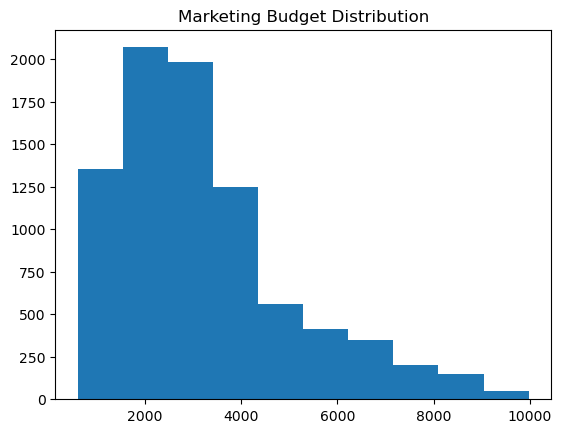

In [104]:
plt.hist(df['Marketing Budget'])
plt.title('Marketing Budget Distribution')

plt.show()

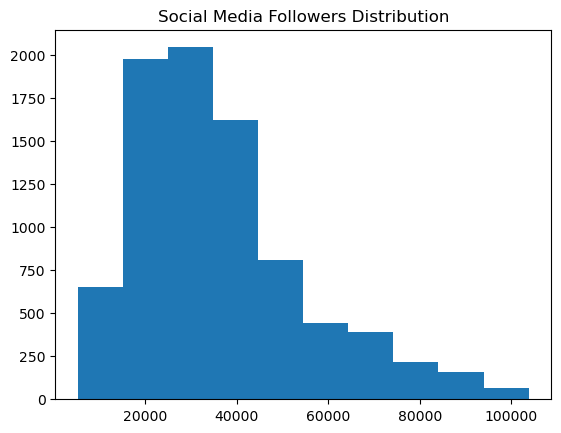

In [105]:
plt.hist(df['Social Media Followers'])
plt.title('Social Media Followers Distribution')

plt.show()

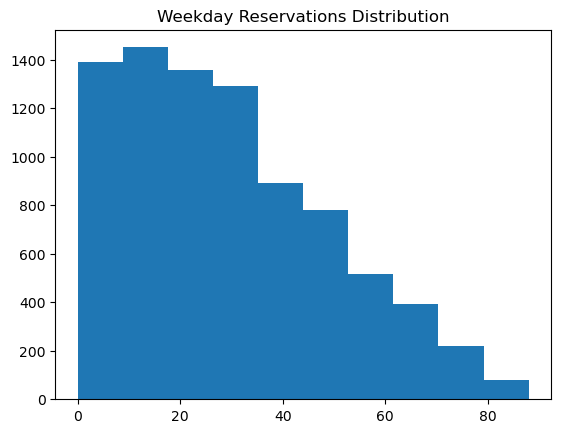

In [106]:
plt.hist(df['Weekday Reservations'])
plt.title('Weekday Reservations Distribution')

plt.show()

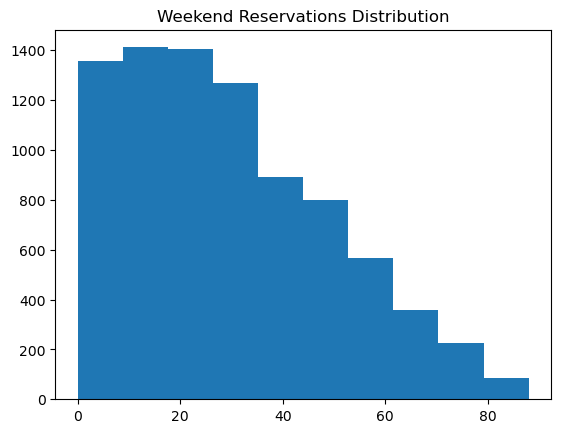

In [107]:
plt.hist(df['Weekend Reservations'])
plt.title('Weekend Reservations Distribution')

plt.show()

In [15]:
# Create a correlation matrix among numeric variables
df.corr(numeric_only = True)

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
Rating,1.000000,0.004862,-0.002265,0.263448,0.289559,0.022192,-0.004238,-0.001272,0.007099,0.000887,-0.000274,0.001706,0.009899
Seating Capacity,0.004862,1.000000,-0.028809,0.509560,0.496917,0.010324,-0.016100,-0.032670,0.002842,-0.006400,0.437416,0.418636,0.677317
Average Meal Price,-0.002265,-0.028809,1.000000,-0.002054,-0.005753,0.000401,0.001802,0.016013,-0.001094,0.011714,-0.018072,-0.027837,0.686365
Marketing Budget,0.263448,0.509560,-0.002054,1.000000,0.987511,0.021612,-0.008985,-0.030064,0.008120,-0.000693,0.225355,0.221088,0.365322
Social Media Followers,0.289559,0.496917,-0.005753,0.987511,1.000000,0.022943,-0.009181,-0.025464,0.007428,0.000210,0.218451,0.214612,0.354466
Chef Experience Years,0.022192,0.010324,0.000401,0.021612,0.022943,1.000000,-0.007710,0.001865,-0.001288,-0.008508,-0.000372,-0.008823,0.026899
Number of Reviews,-0.004238,-0.016100,0.001802,-0.008985,-0.009181,-0.007710,1.000000,0.005842,0.010186,0.005432,0.000780,-0.006126,-0.008233
Avg Review Length,-0.001272,-0.032670,0.016013,-0.030064,-0.025464,0.001865,0.005842,1.000000,0.004807,0.008836,-0.014241,-0.011020,-0.011278
Ambience Score,0.007099,0.002842,-0.001094,0.008120,0.007428,-0.001288,0.010186,0.004807,1.000000,0.000612,-0.012207,-0.016652,0.003388
Service Quality Score,0.000887,-0.006400,0.011714,-0.000693,0.000210,-0.008508,0.005432,0.008836,0.000612,1.000000,-0.002689,0.004204,0.005375


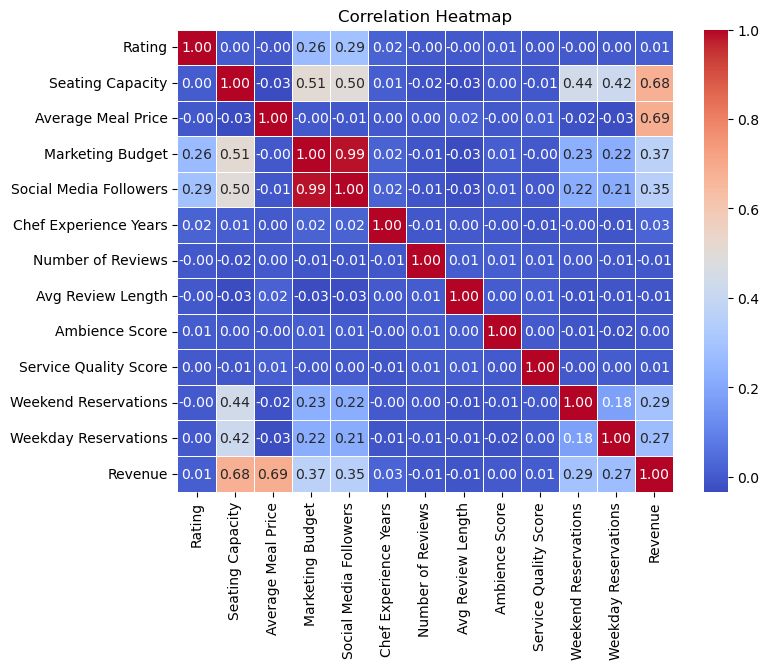

In [16]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

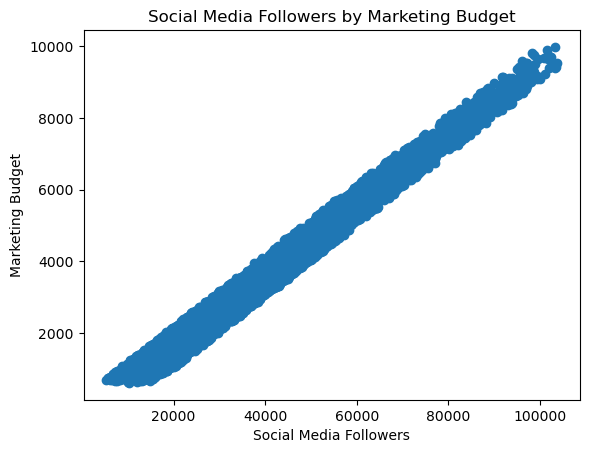

In [17]:
# Scatterplot between Social Media Followers and Marketing Budget
plt.scatter(df['Social Media Followers'], df['Marketing Budget'])
plt.xlabel('Social Media Followers')
plt.ylabel('Marketing Budget')
plt.title('Social Media Followers by Marketing Budget')

plt.show()

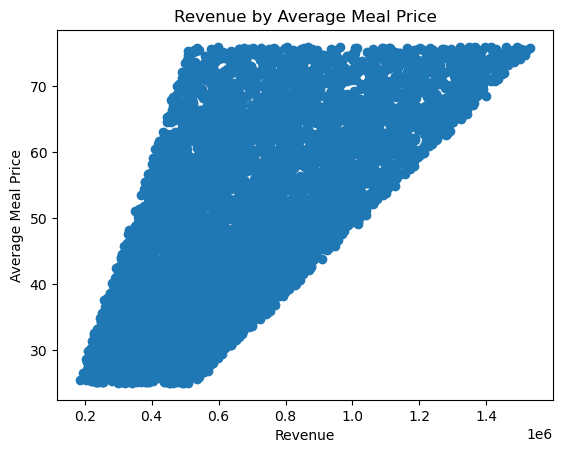

In [18]:
# Scatter plot between Revenue and Average Meal Price
plt.scatter(df['Revenue'], df['Average Meal Price'])
plt.xlabel('Revenue')
plt.ylabel('Average Meal Price')
plt.title('Revenue by Average Meal Price')

plt.show()

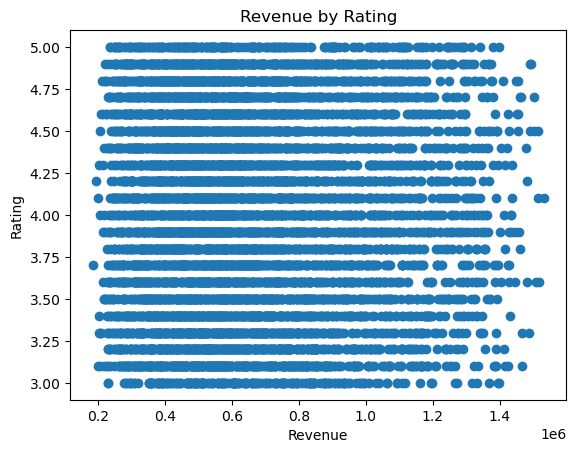

In [19]:
# Scatter plot between Revenue and Customer Rating
plt.scatter(df['Revenue'], df['Rating'])
plt.xlabel('Revenue')
plt.ylabel('Rating')
plt.title('Revenue by Rating')

plt.show()

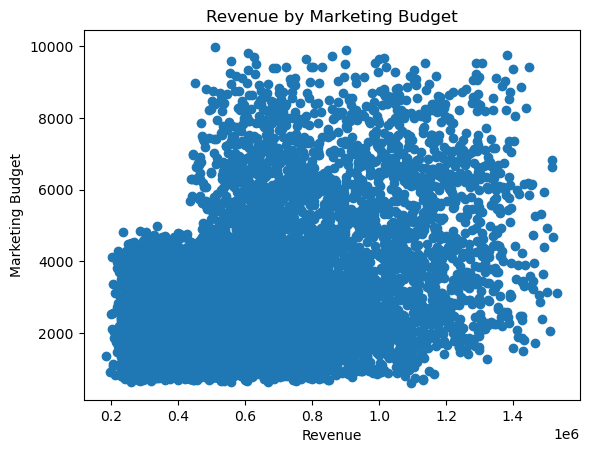

In [20]:
# Scatter plot between Revenue and Marketing Budget
plt.scatter(df['Revenue'], df['Marketing Budget'])
plt.xlabel('Revenue')
plt.ylabel('Marketing Budget')
plt.title('Revenue by Marketing Budget')

plt.show()

In [88]:
# Create dummies variables for column 'Location'
df_dummies = pd.get_dummies(df, columns=["Location", "Cuisine"], drop_first=True)
df_dummies

,Name,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,...,Weekend Reservations,Weekday Reservations,Revenue,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,Restaurant 0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,...,13,4,638945.52,1,0,0,0,0,1,0
1,Restaurant 1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,...,48,6,490207.83,0,0,0,0,0,0,1
2,Restaurant 2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,...,27,14,541368.62,1,0,0,0,1,0,0
3,Restaurant 3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,...,9,17,404556.80,1,0,0,0,1,0,0
4,Restaurant 4,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,...,37,26,1491046.35,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,...,37,0,434653.45,0,1,0,1,0,0,0
8364,Restaurant 8364,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,...,37,21,414977.92,1,0,0,1,0,0,0
8365,Restaurant 8365,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,...,83,21,930395.87,0,0,0,0,1,0,0
8366,Restaurant 8366,3.1,31,44.53,707,7170,1,729,178.482851,6.1,...,6,21,311493.48,1,0,0,0,0,0,0


In [30]:
# Drop restaurant name and highly correlated and uncorrelated variables, then produce a clean dataset for regression
df_clean = df_dummies.drop(['Name', 'Marketing Budget',
                            'Service Quality Score', 'Ambience Score',
                            'Avg Review Length', 'Number of Reviews',
                            'Chef Experience Years', 'Rating',
                            'Parking Availability'],
                           axis = 1)
df_clean

,Seating Capacity,Average Meal Price,Social Media Followers,Weekend Reservations,Weekday Reservations,Revenue,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,38,73.98,23406,13,4,638945.52,1,0,0,0,0,1,0
1,76,28.11,42741,48,6,490207.83,0,0,0,0,0,0,1
2,48,48.29,37285,27,14,541368.62,1,0,0,0,1,0,0
3,34,51.55,15214,9,17,404556.80,1,0,0,0,1,0,0
4,88,75.98,40171,37,26,1491046.35,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,54,34.85,11298,37,0,434653.45,0,1,0,1,0,0,0
8364,49,36.88,20432,37,21,414977.92,1,0,0,1,0,0,0
8365,88,46.87,63945,83,21,930395.87,0,0,0,0,1,0,0
8366,31,44.53,7170,6,21,311493.48,1,0,0,0,0,0,0


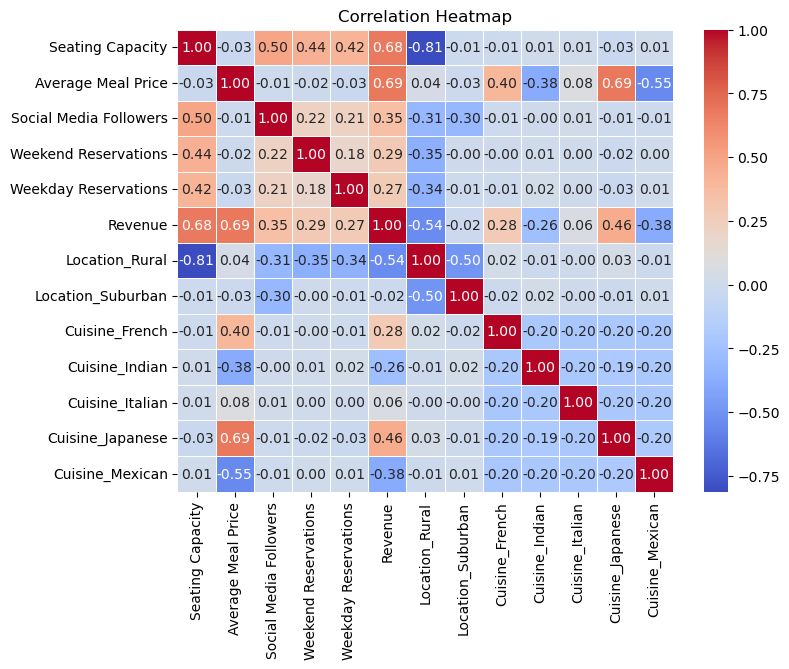

In [31]:
# Create a correlation heatmap without extremely high and low correlated variables
plt.figure(figsize=(8, 6))

sns.heatmap(df_clean.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

# Main Analysis

## Full Model: Including Every Variable in the Dataset

In [69]:
# Drop restaurant names and replace values in column 'Parking Availability'
df_clean_2 = df_dummies.drop('Name', axis = 1)
df_clean_2['Parking Availability'] = df_clean_2['Parking Availability'].replace({'Yes': 1, 'No': 0})
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  8368 non-null   float64
 1   Seating Capacity        8368 non-null   int64  
 2   Average Meal Price      8368 non-null   float64
 3   Marketing Budget        8368 non-null   int64  
 4   Social Media Followers  8368 non-null   int64  
 5   Chef Experience Years   8368 non-null   int64  
 6   Number of Reviews       8368 non-null   int64  
 7   Avg Review Length       8368 non-null   float64
 8   Ambience Score          8368 non-null   float64
 9   Service Quality Score   8368 non-null   float64
 10  Parking Availability    8368 non-null   int64  
 11  Weekend Reservations    8368 non-null   int64  
 12  Weekday Reservations    8368 non-null   int64  
 13  Revenue                 8368 non-null   float64
 14  Location_Rural          8368 non-null   

In [70]:
# Create train and test set
train_set_2, test_set_2 = train_test_split(df_clean_2, test_size=0.3, random_state=17)

In [71]:
# Prepare training data for regression (Linear Regression model)
train_xx = train_set_2.drop('Revenue', axis = 1)
train_yy = train_set_2['Revenue'].copy()

In [72]:
# Prepare testing data for regression (Linear Regression model)
test_xx = test_set_2.drop('Revenue', axis = 1)
test_yy = test_set_2['Revenue'].copy()

In [73]:
# Perform linear regression on training dataset
lin_reg_2 = LinearRegression()
lin_reg_2.fit(train_xx, train_yy)

LinearRegression()

In [74]:
# Create a dataframe to view the regressors' coefficients
pd.DataFrame(lin_reg_2.coef_, index = train_xx.columns)

,0
Rating,445.794143
Seating Capacity,10623.810351
Average Meal Price,13317.434188
Marketing Budget,-2.264658
Social Media Followers,0.475074
Chef Experience Years,855.450520
Number of Reviews,3.189560
Avg Review Length,6.310354
Ambience Score,112.441098
Service Quality Score,302.246145


In [77]:
# In-sample evaluation -> Underfit
pred_train_2 = lin_reg_2.predict(train_xx)

train_mse_2 = mean_squared_error(train_yy, pred_train_2)
train_rmse_2 = np.sqrt(train_mse_2)
train_rmse_2

54770.545483861046

In [76]:
# Out-of-sample evaluation -> Underfit
pred_test_2 = lin_reg_2.predict(test_xx)

test_mse_2 = mean_squared_error(test_yy, pred_test_2)
test_rmse_2 = np.sqrt(test_mse_2)
test_rmse_2

54812.106255886305

In [79]:
# Calculate the differences between the train rsme and test rsme
test_rmse_2 - train_rmse_2

41.56077202525921

In [82]:
# Predicting using a decision tree model
tree_reg_2 = DecisionTreeRegressor(random_state=42)
tree_reg_2.fit(train_xx, train_yy)

DecisionTreeRegressor(random_state=42)

In [128]:
# Create a dataframe to view the regressors' coefficients
pd.DataFrame(tree_reg_2.feature_importances_, index = train_xx.columns)

,0
Rating,8.920250e-05
Seating Capacity,5.150074e-01
Average Meal Price,4.824224e-01
Marketing Budget,8.538103e-05
Social Media Followers,1.117280e-04
Chef Experience Years,2.432447e-04
Number of Reviews,1.188395e-04
Avg Review Length,1.047492e-04
Ambience Score,1.072776e-04
Service Quality Score,1.081316e-04


In [86]:
# In-sample evaluation - Tree Model (All regressors)
tree_pred_train_2 = tree_reg_2.predict(train_xx)

tree_train_mse_2 = mean_squared_error(train_yy, tree_pred_train_2)
tree_train_rmse_2 = np.sqrt(tree_train_mse_2)
tree_train_rmse_2

0.0

In [87]:
# Out-of-sample evaluation - Tree Model (All regressors) -> Overfit
tree_pred_test_2 = tree_reg_2.predict(test_xx)

tree_test_mse_2 = mean_squared_error(test_yy, tree_pred_test_2)
tree_test_rmse_2 = np.sqrt(tree_test_mse_2)
tree_test_rmse_2

16370.042392654497

## Adjusted Model: Removing Variables With Extremely High and Low Correlation Coefficient with Revenue

In [33]:
# Create a train and test for modelling

train_set, test_set = train_test_split(df_clean, test_size=0.3, random_state=17)

In [34]:
train_set

,Seating Capacity,Average Meal Price,Social Media Followers,Weekend Reservations,Weekday Reservations,Revenue,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
721,39,54.27,14902,24,11,485701.62,1,0,0,0,1,0,0
4284,78,61.70,60689,61,66,1097032.75,0,0,1,0,0,0,0
5430,63,25.13,42209,46,37,369496.85,0,1,0,0,0,0,1
8064,50,39.18,29609,17,38,458524.35,1,0,0,0,0,0,0
4349,52,72.82,40426,3,1,843562.74,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,33,30.23,17910,24,0,246074.73,1,0,0,1,0,0,0
3623,46,45.91,24910,31,17,489437.02,1,0,0,0,0,0,0
6061,50,41.90,27883,6,37,478336.85,1,0,0,0,0,0,0
406,74,34.24,49602,15,69,582683.20,0,0,0,0,0,0,1


In [35]:
test_set

,Seating Capacity,Average Meal Price,Social Media Followers,Weekend Reservations,Weekday Reservations,Revenue,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
1814,86,53.05,60866,71,31,1035500.10,0,0,0,0,1,0,0
7595,84,73.88,34764,37,21,1395019.72,0,0,0,0,0,1,0
3984,90,42.58,44485,10,42,877514.71,0,0,0,0,0,0,0
2487,54,61.67,38639,38,53,755310.34,0,1,1,0,0,0,0
6434,59,55.82,35907,21,2,753822.43,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,50,35.03,14643,0,48,400057.09,1,0,0,1,0,0,0
4056,70,38.51,51592,48,67,612128.05,0,0,0,1,0,0,0
6597,58,55.79,36495,39,42,730167.82,0,1,1,0,0,0,0
7130,50,33.52,21632,13,48,399179.82,0,1,0,1,0,0,0


In [36]:
# Prepare training data for regression
train_x = train_set.drop('Revenue', axis = 1)
train_y = train_set['Revenue'].copy()

In [37]:
# Prepare testing data for regression
test_x = test_set.drop('Revenue', axis = 1)
test_y = test_set['Revenue'].copy()

### Linear Regression:

In [38]:
# Perform linear regression on training dataset

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

LinearRegression()

In [45]:
# View regression coefficients
# For Location variables, it is explained relative to 'Downtown'
# For Cuisine variables, it is explained relative to 'American'
pd.DataFrame(lin_reg.coef_, index = train_x.columns)


,0
Seating Capacity,10632.038332
Average Meal Price,13293.886552
Social Media Followers,0.272825
Weekend Reservations,-40.329991
Weekday Reservations,-9.514468
Location_Rural,2689.183240
Location_Suburban,4599.405909
Cuisine_French,-1590.707036
Cuisine_Indian,629.354199
Cuisine_Italian,388.367035


In [48]:
# Predict the train data
pred_train = lin_reg.predict(train_x)
pd.DataFrame(pred_train)

,0
0,5.114906e+05
1,1.030722e+06
2,3.858725e+05
3,4.314878e+05
4,9.004774e+05
...,...
5852,1.292797e+05
5853,4.767807e+05
5854,4.676294e+05
5855,6.222956e+05


In [50]:
# In-model evaluation - Linear Regression (selected regressors)
train_mse = mean_squared_error(train_y, pred_train)
train_mse = np.sqrt(train_mse)
train_mse

55009.65726171183

In [51]:
pred_test = lin_reg.predict(test_x)

In [52]:
# Out-of-model evaluation - Linear Regression (selected regressors)
# From the result below, it indicates that there is a slight underfit, but overall a good model
test_mse = mean_squared_error(test_y, pred_test)
test_mse = np.sqrt(test_mse)
test_mse

55051.587673855356

In [80]:
test_mse - train_mse

41.930412143527064

### Decision Tree Regression Model:

In [60]:
# Predicting using a different model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_x, train_y)

DecisionTreeRegressor(random_state=42)

In [63]:
# Create a dataframe to view the regressors' coefficients
pd.DataFrame(tree_reg.feature_importances_, index = train_x.columns)

,0
Seating Capacity,0.515205
Average Meal Price,0.482691
Social Media Followers,0.000290
Weekend Reservations,0.000220
Weekday Reservations,0.000208
Location_Rural,0.000027
Location_Suburban,0.000113
Cuisine_French,0.000003
Cuisine_Indian,0.000009
Cuisine_Italian,0.001219


In [64]:
# In-sample evaluation - Tree Model (selected regressors)
tree_pred_train = tree_reg.predict(train_x)
tree_train_mse = mean_squared_error(train_y, tree_pred_train)
tree_train_mse = np.sqrt(tree_train_mse)
tree_train_mse

0.0

In [65]:
# Out-of-sample evaluation - Tree Model (selected regressors)
# From the mse below, we can see that the model overfit the training data
tree_pred_test = tree_reg.predict(test_x)
tree_test_mse = mean_squared_error(test_y, tree_pred_test)
tree_test_mse = np.sqrt(tree_test_mse)
tree_test_mse

14807.7426092992

In [81]:
tree_test_mse-tree_train_mse

14807.7426092992

## Model Improving: Taking the Natural Log (ln) of the Dependent Variable 'Revenue'

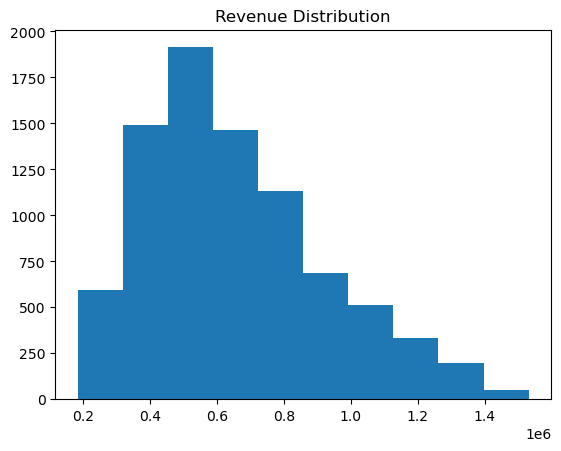

In [130]:
plt.hist(df['Revenue'])
plt.title('Revenue Distribution')

plt.show()

In [131]:
# Create new column 'lnRevenue'
df['lnRevenue'] = np.log(df['Revenue']+0.01)

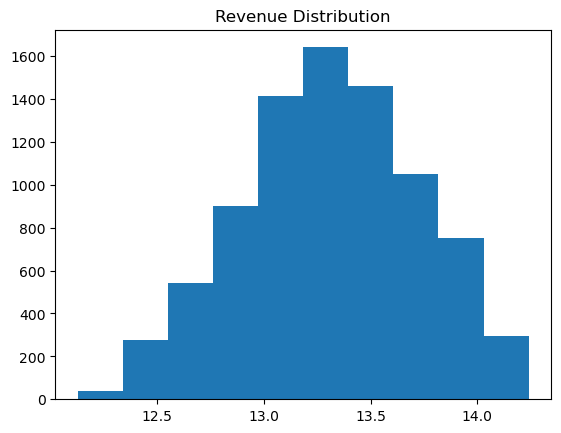

In [132]:
# Revenue distribution after taking the natural log of 'Revenue'
plt.hist(df['lnRevenue'])
plt.title('Revenue Distribution')

plt.show()

In [139]:
# Drop restaurant names and replace values in column 'Parking Availability'
df_dummies['lnRevenue'] = np.log(df_dummies['Revenue']+0.01)
df_ln = df_dummies.drop(['Name', 'Revenue'], axis = 1)
df_ln['Parking Availability'] = df_clean_2['Parking Availability'].replace({'Yes': 1, 'No': 0})
df_ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  8368 non-null   float64
 1   Seating Capacity        8368 non-null   int64  
 2   Average Meal Price      8368 non-null   float64
 3   Marketing Budget        8368 non-null   int64  
 4   Social Media Followers  8368 non-null   int64  
 5   Chef Experience Years   8368 non-null   int64  
 6   Number of Reviews       8368 non-null   int64  
 7   Avg Review Length       8368 non-null   float64
 8   Ambience Score          8368 non-null   float64
 9   Service Quality Score   8368 non-null   float64
 10  Parking Availability    8368 non-null   int64  
 11  Weekend Reservations    8368 non-null   int64  
 12  Weekday Reservations    8368 non-null   int64  
 13  Location_Rural          8368 non-null   uint8  
 14  Location_Suburban       8368 non-null   

In [140]:
# Create train and test set
train_set_ln, test_set_ln = train_test_split(df_ln, test_size=0.3, random_state=17)

In [141]:
# Prepare training data for regression (Linear Regression model)
trainln_x = train_set_ln.drop('lnRevenue', axis = 1)
trainln_y = train_set_ln['lnRevenue'].copy()

In [142]:
# Prepare testing data for regression (Linear Regression model)
testln_x = test_set_ln.drop('lnRevenue', axis = 1)
testln_y = test_set_ln['lnRevenue'].copy()

### Linear Regression Model:

In [143]:
# Perform linear regression on training dataset
lin_reg_ln = LinearRegression()
lin_reg_ln.fit(trainln_x, trainln_y)

LinearRegression()

In [144]:
# Create a dataframe to view the regressors' coefficients
pd.DataFrame(lin_reg_ln.coef_, index = trainln_x.columns)

,0
Rating,1.364410e-03
Seating Capacity,1.736597e-02
Average Meal Price,2.176769e-02
Marketing Budget,3.677451e-06
Social Media Followers,-3.205998e-08
Chef Experience Years,1.877366e-03
Number of Reviews,3.082095e-06
Avg Review Length,6.374374e-06
Ambience Score,1.019928e-03
Service Quality Score,7.785017e-04


In [145]:
# In-sample evaluation - lnRevenue
pred_trainln = lin_reg_ln.predict(trainln_x)

train_mse_ln = mean_squared_error(trainln_y, pred_trainln)
train_rmse_ln = np.sqrt(train_mse_ln)
train_rmse_ln

0.03638471838179444

In [146]:
# Out-of-sample evaluation - lnRevenue
pred_testln = lin_reg_ln.predict(testln_x)

test_mse_ln = mean_squared_error(testln_y, pred_testln)
test_rmse_ln = np.sqrt(test_mse_ln)
test_rmse_ln

0.03596236771412093

In [147]:
# Calculate the differences between the train rsme and test rsme
test_rmse_ln - train_rmse_ln

-0.00042235066767350865

### Decision Tree Regression Model:

In [167]:
# Predicting using a decision tree model
tree_reg_ln = DecisionTreeRegressor(random_state=42)
tree_reg_ln.fit(trainln_x, trainln_y)

DecisionTreeRegressor(random_state=42)

In [168]:
# Create a dataframe to view the regressors' coefficients
pd.DataFrame(tree_reg_ln.feature_importances_, index = trainln_x.columns)

,0
Rating,7.545319e-05
Seating Capacity,5.090376e-01
Average Meal Price,4.878031e-01
Marketing Budget,1.369906e-04
Social Media Followers,1.330746e-04
Chef Experience Years,3.872310e-04
Number of Reviews,1.031448e-04
Avg Review Length,1.319344e-04
Ambience Score,9.867494e-05
Service Quality Score,1.309514e-04


In [169]:
# In-sample evaluation - Tree Model
tree_pred_train_ln = tree_reg_ln.predict(trainln_x)

tree_train_mse_ln = mean_squared_error(trainln_y, tree_pred_train_ln)
tree_train_rmse_ln = np.sqrt(tree_train_mse_ln)
tree_train_rmse_ln

0.0

In [170]:
# Out-of-sample evaluation - Tree Model
tree_pred_test_ln = tree_reg_ln.predict(testln_x)

tree_test_mse_ln = mean_squared_error(testln_y, tree_pred_test_ln)
tree_test_rmse_ln = np.sqrt(tree_test_mse_ln)
tree_test_rmse_ln

0.02730591116992125

## Next Steps: Include Only Statistically Significant Variables to the Model and Compare the Performance with the Model Using 'lnRevenue'

In [150]:
df2 = df_ln.drop('Marketing Budget', axis = 1)
df_x = df2.drop('lnRevenue', axis = 1)
df_y = df2['lnRevenue'].copy()

In [151]:
# Add constants to the DataFrame and run a OLS regression to determine statistical significance
df_const = sm.add_constant(df_x)
est = sm.OLS(df_y, df_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              lnRevenue   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.615e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:03:10   Log-Likelihood:                 15885.
No. Observations:                8368   AIC:                        -3.173e+04
Df Residuals:                    8348   BIC:                        -3.159e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

In [115]:
df2 = sm.add_constant(df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   8368 non-null   float64
 1   Rating                  8368 non-null   float64
 2   Seating Capacity        8368 non-null   int64  
 3   Average Meal Price      8368 non-null   float64
 4   Social Media Followers  8368 non-null   int64  
 5   Chef Experience Years   8368 non-null   int64  
 6   Number of Reviews       8368 non-null   int64  
 7   Avg Review Length       8368 non-null   float64
 8   Ambience Score          8368 non-null   float64
 9   Service Quality Score   8368 non-null   float64
 10  Parking Availability    8368 non-null   int64  
 11  Weekend Reservations    8368 non-null   int64  
 12  Weekday Reservations    8368 non-null   int64  
 13  Revenue                 8368 non-null   float64
 14  Location_Rural          8368 non-null   

In [157]:
df3 = sm.add_constant(df2)
df3 = df2.drop(['Rating', 'Number of Reviews', 'Avg Review Length', 'Parking Availability'], axis = 1)

In [158]:
df3

,Seating Capacity,Average Meal Price,Social Media Followers,Chef Experience Years,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,lnRevenue
0,38,73.98,23406,13,1.3,7.0,13,4,1,0,0,0,0,1,0,13.367574
1,76,28.11,42741,8,2.6,3.4,48,6,0,0,0,0,0,0,1,13.102585
2,48,48.29,37285,18,5.3,6.7,27,14,1,0,0,0,1,0,0,13.201856
3,34,51.55,15214,13,4.6,2.8,9,17,1,0,0,0,1,0,0,12.910547
4,88,75.98,40171,9,8.6,2.1,37,26,0,0,0,0,0,1,0,14.214989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,54,34.85,11298,11,9.5,5.0,37,0,0,1,0,1,0,0,0,12.982304
8364,49,36.88,20432,9,2.7,2.6,37,21,1,0,0,1,0,0,0,12.935981
8365,88,46.87,63945,6,4.8,1.7,83,21,0,0,0,0,1,0,0,13.743365
8366,31,44.53,7170,1,6.1,2.1,6,21,1,0,0,0,0,0,0,12.649134


In [159]:
train_set_3, test_set_3 = train_test_split(df3, test_size=0.3, random_state=17)

In [160]:
train_x3 = train_set_3.drop('lnRevenue', axis = 1)
train_y3 = train_set_3['lnRevenue'].copy()

In [161]:
test_x3 = test_set_3.drop('lnRevenue', axis = 1)
test_y3 = test_set_3['lnRevenue'].copy()

### Linear Regression Model:

In [162]:
lin_reg3 = LinearRegression()
lin_reg3.fit(train_x3, train_y3)

LinearRegression()

In [176]:
# Create a dataframe to view the regressors' coefficients
pd.DataFrame(lin_reg3.coef_, index = train_x3.columns)

,0
Seating Capacity,1.736301e-02
Average Meal Price,2.177073e-02
Social Media Followers,3.349424e-07
Chef Experience Years,1.875812e-03
Ambience Score,1.030363e-03
Service Quality Score,7.834595e-04
Weekend Reservations,8.284229e-05
Weekday Reservations,4.498977e-05
Location_Rural,2.649406e-02
Location_Suburban,7.077432e-02


In [163]:
# In-sample evaluation
pred_train_3 = lin_reg3.predict(train_x3)

train_mse3 = mean_squared_error(train_y3, pred_train_3)
train_rmse3 = np.sqrt(train_mse3)
train_rmse3

0.03642229920469892

In [164]:
# Out-of-sample evaluation
pred_test_3 = lin_reg3.predict(test_x3)

test_mse3 = mean_squared_error(test_y3, pred_test_3)
test_rmse3 = np.sqrt(test_mse3)
test_rmse3

0.035951039717551994

In [165]:
test_rmse3 - train_rmse3

-0.0004712594871469286

### Decision Tree Regression Model

In [172]:
# Predicting using a decision tree model
tree_reg_ln2 = DecisionTreeRegressor(random_state=42)
tree_reg_ln2.fit(train_x3, train_y3)

DecisionTreeRegressor(random_state=42)

In [174]:
# Create a dataframe to view the regressors' coefficients
pd.DataFrame(tree_reg_ln2.feature_importances_, index = train_x3.columns)

,0
Seating Capacity,5.090811e-01
Average Meal Price,4.878859e-01
Social Media Followers,2.529584e-04
Chef Experience Years,4.472039e-04
Ambience Score,1.432946e-04
Service Quality Score,1.680938e-04
Weekend Reservations,1.682460e-04
Weekday Reservations,1.863274e-04
Location_Rural,2.485037e-06
Location_Suburban,1.484978e-03


In [179]:
# In-sample evaluation - Tree Model
tree_pred_train_ln2 = tree_reg_ln2.predict(train_x3)

tree_train_mse_ln2 = mean_squared_error(train_y3, tree_pred_train_ln2)
tree_train_rmse_ln2 = np.sqrt(tree_train_mse_ln2)
tree_train_rmse_ln2

0.0

In [180]:
# Out-of-sample evaluation - Tree Model
tree_pred_test_ln2 = tree_reg_ln2.predict(test_x3)

tree_test_mse_ln2 = mean_squared_error(test_y3, tree_pred_test_ln2)
tree_test_rmse_ln2 = np.sqrt(tree_test_mse_ln2)
tree_test_rmse_ln2

0.026597088952372137

# Summary and Conclusion

## - As observed above, the performance of the linear regression using the original Revenue column was not good, with a very high RSME score for both the train and test set, indicating UNDERFITTING.

## - Also the performance of the Decision Tree Model using the original Revenue column was not good, with a 0 RSME score for the train set, and high RSME for the test set, indicating OVERFITTING.

## - However, when taking the natural log of the Revenue column (because the original column is right-skewed), the performance was much better, with the RMSE of both train and test being near 0 for both models. --> This shows that a skewed set of data could affect our models performance and result negatively

## - We also want to try to find out if all these variables are statistically significant, and included only statistically significant variables to the last set of models. This last set of models resulted in a very low RMSE score for both train and test set for both models --> This shows that there is not much differences between the performance of the regression using lnRevenue and the regression using lnRevenue but only included statistically significant variables.